<a href="https://colab.research.google.com/github/audrey-fontana/Ciencia_Dados/blob/main/Machine_Learning_Preco_Imovel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modelo de Machine Learning Simples**

A base de dados contém informações básicas de imóveis:

  Área e idade do imóvel, número de salas e que quartos, tamanho populacional da região do imóvel, preço e endereço.

O exercício consiste em desenvolver um modelo de machine learning utilizando regressão linear para identificar as relações entre as variáveis e predizer o preço de um imóvel fictício.

As informações sobre o imóvel fictício estão descritas mais adiante no exercício.

In [ ]:
# Instalação das bibliotecas utilizadas

%pip install plotly
%pip install cufflinks
%pip install chart_studio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.8 MB/s eta 0:00:00


In [ ]:
# Instalando as bibliotecas

import pandas as pd
import seaborn as sns
import numpy as np
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

In [ ]:
# Importando a base de dados e visualizando os dados
# O comando "sep" indica o separador dos dados

base_casa = pd.read_csv("/content/USA_Housing.csv", sep = ",")
base_casa.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
# verificação se há presença de valores nulos

base_casa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
# Verificando as principais métricas dos dados

base_casa.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


Também é possível verificas as principais métricas de uma variável graficamente, conforme demonstrado abaixo.

Ao passar o cursor do mouse no gráfico, verificamos os mesmos indicadores de máximos e mínimos, média e quartis, apresentados na tabela acima.

In [ ]:
# Verificando as métricas de uma variável em formato gráfico

fig = px.box(base_casa, x = "Avg. Area Income")
fig.update_traces(line_color = "blue")

In [ ]:
# Verificando as métricas de uma variável em formato gráfico

fig = px.box(base_casa, x = "Price")
fig.update_traces(line_color = "blue")

In [ ]:
# Identificando os nomes das colunas do banco de dados

base_casa.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [ ]:
# Renomeando as colunas

base_casa = base_casa.rename(columns = {'Avg. Area Income':"area_income", 'Avg. Area House Age':"house_age",
                                        'Avg. Area Number of Rooms':"number_rooms",'Avg. Area Number of Bedrooms':"number_bedrooms",
                                        'Area Population':"area_population"})
base_casa.head()

,area_income,house_age,number_rooms,number_bedrooms,area_population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


A construção de um modelo de regressão linear utiliza apenas valores numéricos, portanto precisamos excluir a coluna de enderesso do banco de dados, uma vez que essa variável não será relevante ou utilizada.

Para isso, iremos utilizar a função .drop.

  Para excluir uma coluna do banco de dados, utilizamos axis = 1

  Para excluir uma linha do banco de dados, utilizamos axis = 0

  O "inplace" é utilizado para sobrescrever o novo banco de dados no antigo.

In [ ]:
# Excluindo a coluna de enderesso

base_casa.drop(["Address"], axis = 1, inplace = True)
base_casa.head()

,area_income,house_age,number_rooms,number_bedrooms,area_population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


Agora iremos tentar identificar as relações que as variáveis possuem entre si.

Para isso, iremos utilizar a função sns.pairplot, que retorna um gráfico para cada interação entre variáveis.

As variáveis que possuem relações fortes apresentam uma tendência linear crescente ou decrescente.

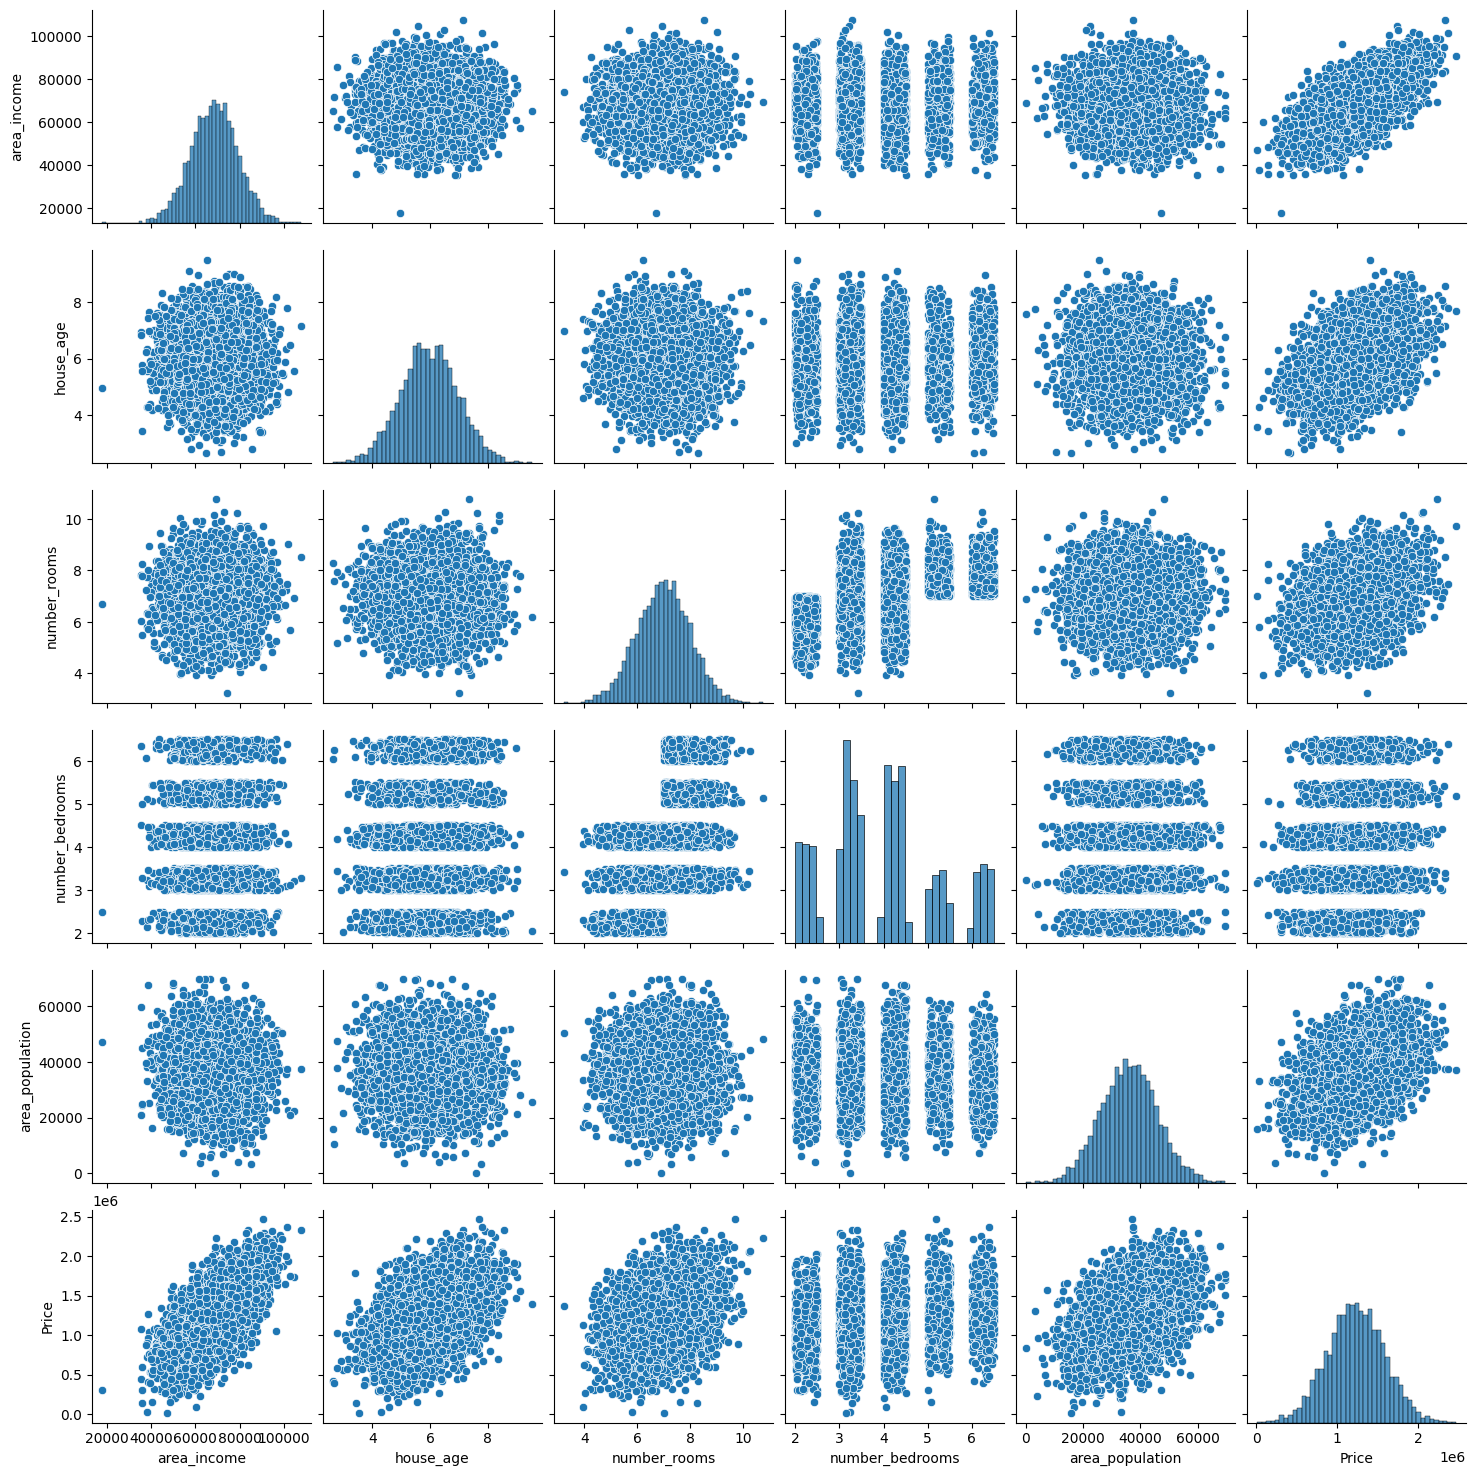

In [ ]:
# Identificando as relações entre as variáveis

sns.pairplot(base_casa);

Nas interações acima, vemos que as interações das variáveis com o "preço" tem algum tipo de tendência.

Vamos verificar essas interações isoladamente.

In [ ]:
# Puxando os nomes das colunas

base_casa.columns

Index(['area_income', 'house_age', 'number_rooms', 'number_bedrooms',
       'area_population', 'Price'],
      dtype='object')

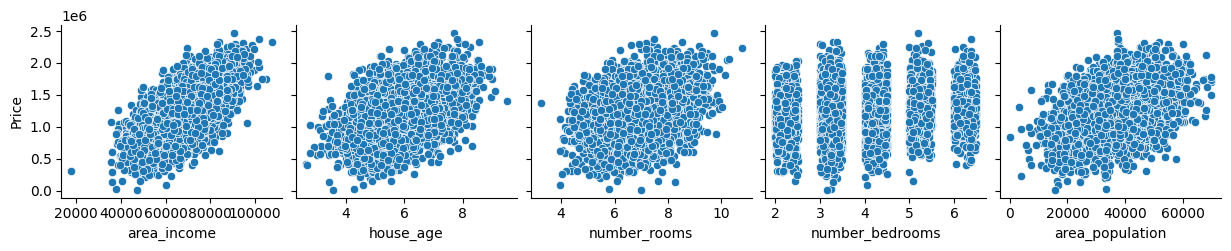

In [ ]:
# Criando gráficos de interação entre todas as variáveis com o preço

sns.pairplot(base_casa, x_vars = ['area_income', 'house_age', 'number_rooms', 'number_bedrooms',
       'area_population'], y_vars = "Price")

Também podemos utilizar a função .corr, que retorna um valor de correlação para cada interação.

A variável corr varia entre -1 e 1, sendo que resultados mais próximo das extremidades representa relações mais fortes do que valores mais próximos de 0.

Valores positivos indicam uma correlação diretamente proporcional e, valores negativos representam uma correlação inversamente proporcional.

In [ ]:
# Verificando a correlação entre as variáveis

base_casa.corr()

,area_income,house_age,number_rooms,number_bedrooms,area_population,Price
area_income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
house_age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
number_rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
number_bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
area_population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


Analisando os valores acima, comprovamos que as relações de preço com as demais variáveis representam correlações mais fortes.

Também podemos gerar um gráfico de calor das correlações, que apresenta as mesmas informações de uma maneira visualmente mais atrativa.

<Axes: >

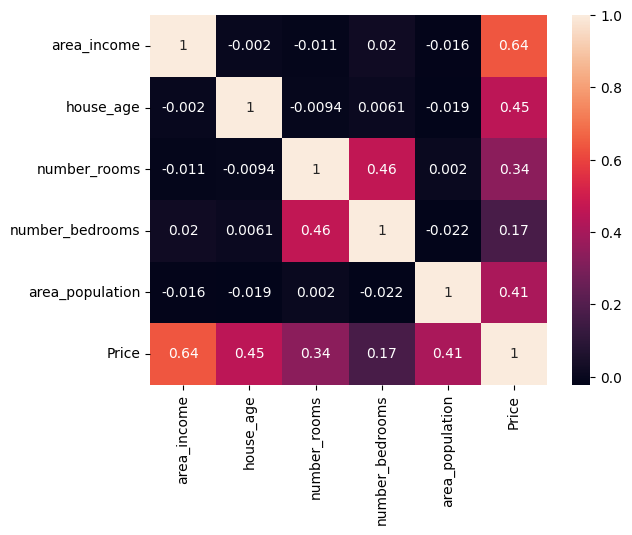

In [ ]:
# criando mapa de calor das correlações

sns.heatmap(base_casa.corr(), annot = True)

<Axes: xlabel='Price', ylabel='Count'>

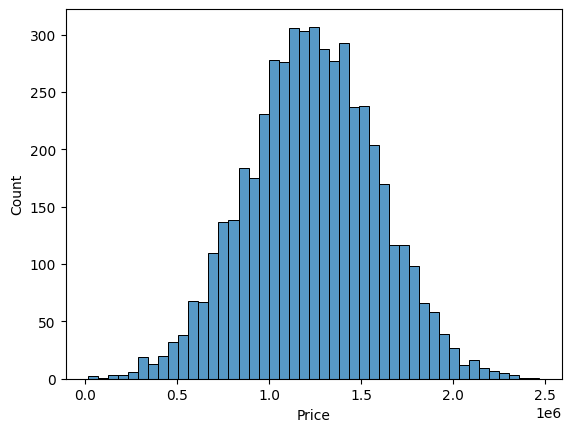

In [ ]:
# Criando um histograma da variável preço

sns.histplot(base_casa["Price"])

In [ ]:
# Puxando o nome das colunas

base_casa.columns

Index(['area_income', 'house_age', 'number_rooms', 'number_bedrooms',
       'area_population', 'Price'],
      dtype='object')

Com o tratamento e exploração prévia dos dados, verificamos que as variáveis de características do imóvel se relacionam com a variável de preço, indicando que é plausível criar um modelo de consiga predizer o preço de um imóvel a partir de algumas informações dadas.

Agora que já exploramos os dados, iremos iniciar a construção do modelo.

Precisamos atribuir as variáveis:

X são variáveis explicativas, que ajudam na construção do modelo (independentes)

Y é a variável target, que explica o fenômeno (dependentes)

In [ ]:
# Atribuindo quais são as variáveis X e Y

X = base_casa[['area_income', 'house_age', 'number_rooms', 'number_bedrooms', 'area_population']]
Y = base_casa[["Price"]]


In [ ]:
# Importação da biblioteca

from sklearn.model_selection import train_test_split

A função "train_test_split" divide os dados em duas categorias, de treinamento e de teste.

Essa divisão é fundamental para evitar que o modelo "decore" os dados de treinamento e para testar sua capacidade de generalizar para novos dados. Isso ajuda a avaliar o desempenho real do modelo em cenários futuros.

As **variáveis de treinamento** serão utilizadas para treinar o modelo (X_train e Y_train)

As **variáveis de teste** irão validar o modelo, avaliando o seu desempenho (X_test, Y_test).

Precisamos definir a quantidade de dados utilizados em cada categoria (tamanho). Para isso, dividimos os dados em "train_size" e "test_size". No nosso modelo, iremos utilizar 70% dos dados para treinamento e 30% dos dados para teste.

A utilização do "random_state = 42" garante que a divisão dos dados será sempre a mesma se o código for executado novamente. Isso é útil para comparação e validação de resultados.


In [ ]:
# Dividindo os dados

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3500, 5)
(3500, 1)
(1500, 5)
(1500, 1)


In [ ]:
# Importando a biblioteca de regressão linear

from sklearn.linear_model import LinearRegression

In [ ]:
# Renomeando

lm = LinearRegression()

A função .fit é utilizado para treinar o modelo aos dados fornecidos

In [ ]:
lm.fit(X_train, Y_train)

LinearRegression()

lm.predict(): O método predict usa o modelo treinado (no caso, lm) para prever os valores de saída com base nos dados de entrada fornecidos.

X_test: É o conjunto de dados de teste que contém as features (variáveis independentes), mas não as respostas verdadeiras.

y_pred: As previsões feitas pelo modelo com base no X_test.

In [ ]:
y_pred = lm.predict(X_test)

O modelo aplica o conhecimento adquirido durante o treinamento (armazenado nos parâmetros ajustados, como coeficientes) para calcular os valores preditos correspondentes a X_test.

O resultado (y_pred) será uma lista ou array com os valores estimados para as entradas fornecidas.

O resultado será:

y_pred contém os valores previstos para cada entrada em X_test.

Esses valores podem ser comparados com os valores reais (Y_test) para avaliar o desempenho do modelo.

In [ ]:
# Importando a biblioteca de r2

from sklearn.metrics import r2_score

Vamos calcular o **coeficiente de determinação (r2)** do modelo, que é uma métrica para avaliar o desempenho de um modelo de regressão. Esse coeficiente mede o quanto da variabilidade dos dados o modelo consegue explicar.

1.0: Modelo perfeito (as previsões correspondem exatamente aos valores reais)

0.0: Modelo que não consegue explicar a variabilidade nos dados

Valores negativos: O modelo é pior que uma simples média dos dados

In [ ]:
# Calculando o coeficiente de determinação

r = r2_score(Y_test, y_pred)
print("r_quadrado:", r)

r_quadrado: 0.914681849875402


O modelo consegue explicar 91% das variabilidades dos dados

In [ ]:
# Importando biblioteca

import matplotlib.pyplot as plt

Vamos analizar visualmente os valores do Y_test com os valores de y_pred (que são as previsões feitas pelo modelo)

Vamos criar uma lista "c" com valores que variam de 1 até o tamanho da amostra +1, que para esse caso é 1501.

Text(0, 0.5, 'Preço do imóvel')

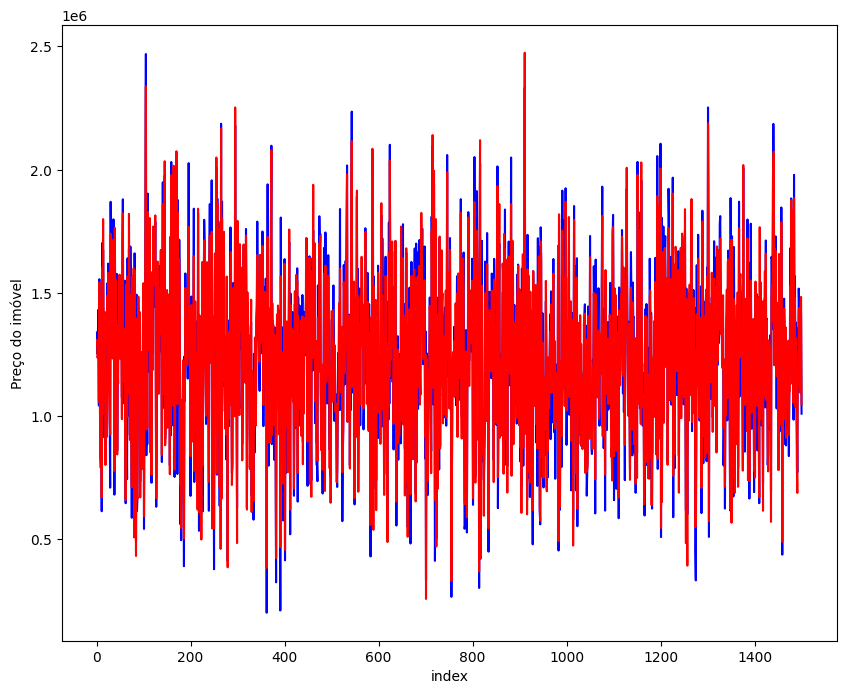

In [ ]:
# Criando os gráficos de comparação

c = [i for i in range(1, 1501, 1)]
fig = plt.figure(figsize = (10, 8))
plt.plot(c, Y_test, color = "blue")
plt.plot(c, y_pred, color = "red")
plt.xlabel("index")
plt.ylabel("Preço do imóvel")

Perceba pelo gráfico que os valores da previsão do modelo, em vermelho, quase sobrepõe por completo os valores de teste, em azul.

Agora vamos utilizar o modelo para prever o preço de um imóvel com as seguintes condições:

área = 50
idade do imóvel = 30
número de salas = 7
número de quartos = 5
população = 200

In [ ]:
# Utilizando o modelo com os valores da premissa

area_income = 50
house_age = 30
number_room = 7
number_bedroom = 5
area_population = 200
entrada = [[area_income, house_age, number_room, number_bedroom, area_population]]
lm.predict(entrada)[0]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([3183762.92246664])

Array significa o resultado de saída, nesse caso, a previsão do preço do imóvel fictício.